# pyCAT

## Picat language model implementation in metaL/Python

github: https://github.com/ponyatov/pycat

Jupyter notebook render: https://nbviewer.jupyter.org/github/ponyatov/pycat/blob/master/pycat.ipynb

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ponyatov/pycat/master?filepath=pycat.ipynb)

This manual is about learning Picat programming language by reimplementing it yourself from scratch. 

This method is not for a total newbie in programming as you must know Python a bit to start, and have some entry-level programming skills. The Python was selected as it is the most popular programming language now for programming learning, and because this language implementation is so dynamic, as you can implement your own language system atop of PVM runtime. The advantage of learning by reimplementing is you are able not only embed this scripting engine to any software system you are doing but also deeply understand the original Picat.

But it is not the end as this Picat implementation uses not pure Python but the `metaL`: homoiconic hypergraph model written itself in Python -- *executable data structure (EDS)* built from some sort of Marvin Minsky frames [minsky]. It was mostly selected to make this language to be not visual but **visualizable**: it is important for the newbies that a learning programming system to be Smalltalk-like interactive and deeply researchable.

### MIT License

Copyright (c) 2019 Dmitry Ponyatov <<dponyatov@gmail.com>>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice (including the next paragraph) shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Install

```sh
      ~$ git clone -o gh https://github.com/ponyatov/pycat ; cd pycat
~/pycat$ make install
```

### Run

```sh
~/pycat$ .bin/activate
 (venv)$ jupyter notebook pycat.ipynb &
```

# Links

* [minsky] [A Framework for Representing Knowledge](https://courses.media.mit.edu/2004spring/mas966/Minsky%201974%20Framework%20for%20knowledge.pdf) (c) Marvin Minsky, 1974
  * [Фреймы для представления знаний](https://royallib.com/book/minskiy_marvin/freymi_dlya_predstavleniya_znaniy.html) (c) Марвин Минский, М.: Мир, 1979

* **Programming Python, 4th Edition** (c) Mark Lutz, O'Reilly 2019
  * [Изучаем Python. Том 1](https://www.ozon.ru/context/detail/id/156082566/) (c) Марк Лутц, М.: Вильямс, 2019


### Picat language

* [Picat Google group](https://groups.google.com/forum/#!forum/picat-lang)
  * http://picat-lang.org/
    * [Constraint Solving and Planning with Picat](http://picat-lang.org/picatbook2015.html) (c) Neng-Fa Zhou, Håkan Kjellerstrand, Jonathan Fruhman
    * [Hakan Kjellerstrand page](http://hakank.org/picat/)

* [Picat code samples](https://github.com/claudiosa/CCS/tree/master/picat) (c) Claudio Cesar de Sá
  * [Udemy course in Portuguese](https://www.udemy.com/course/picat-uma-linguagem-de-programacao-multiparadigma/)

### Prolog implementation

* [Yield Prolog](http://yieldprolog.sourceforge.net/)
* [Warren's Abstract Machine: A Tutorial Reconstruction](http://wambook.sourceforge.net/)

## Graph visualization

This Jupyter notebook is packed with `graphviz` binding to show data structures we'll make later. To make it work locally, or [via Binder from the `master` branch on the GitHub](https://mybinder.org/v2/gh/ponyatov/pycat/master?filepath=pycat.ipynb) your host system must be preinstalled with some APT packages:


In [1]:
! cat apt.txt

graphviz


In [2]:
! grep graphviz requirements.txt

graphviz==0.13.2


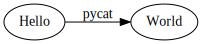

In [3]:
import graphviz
viz = graphviz.Digraph(graph_attr={'rankdir':'LR'})
viz.edge('Hello','World',label='pycat')
viz

# Frame

The hypothesis: **directed hypergraph is a universal knowledge representation** that can describe anything including software specifications, programs, data and documentation in the same universal form. As we use the *same structure for program and data* representation, and this structure can be executed by interpretation, we have a **homoiconic metaprogramming system**.

The `Frame` is a root object class that is implemented on ideas of a [minsky] book. The original frame model was *extended* to support **ordered storage** is definitely required for representing
* *attribute grammar* widely known in programming languages design, and
* ordered data containers itself.

The presence of an ordered collection is definitively required for representing program source code in any programming language, as this is very close to classical attribute grammar, parsing and abstract syntax trees, and graphs used in compiler design. The frame (object) hypergraph representation of a program as an executable form is clear and native for any work involved with source code transformations: synthesis, modifications, analysis, cross-language translation, etc.

### EDS: Executable Data Structure method

In software design in a case when our programming language or computing platform does not provide some features, we can add a layer of interpretation for some data structure to get more dynamics or extra features such as metaprogramming, program self-modification, compact low memory bytecode, etc. For example, in the Lisp language, all programs are represented in the form of executable lists. Java uses bytecode as the main program form, which does not require, but often uses JIT for runtime compilation as a way to make the program run faster.

The `metaL` homoiconic layer uses attributed hypergraph as an *executable data structure*:
* every hypergraph **frame defines N-ary relations between operands** in `nest[]` and named attributes in `slot{}`s the way close to Prolog predicates
* **frames are typed** so every frame class can describe different behavior and properties
* the graph has the advantage to be not visual but **visualizable language**, which can be used for multiparadigm programming

### Homoiconic programming languages

> **Homoiconicity** (homoiconic) \
is a property of some programming languages in which *data and program representation is the same*
and defined in core types of the same language. In other words, homoiconicity is when the *program source code* is written *as the reflectable (and mutable) data structure* and the programming language provides transparent access to the program as data in runtime.

In homoiconic language, **metaprogramming** *is the main software development technique*, which is also used to expand the language to the capabilities that a particular programmer needs. As the metaprogramming language, the Lisp language is the first sample, which was created to process data presented in the form of nested lists. Lisp programs are also recorded, stored, and executed as lists; as a result, it makes the running program able to access its own source code as a native data structure, as well as automatically change itself on the fly. Homoiconic languages, as a rule, include full support for *syntactic macros*, allowing the programmer to define new syntactic structures and express transformations of programs in a compact form.

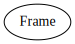

In [4]:
viz = graphviz.Digraph(graph_attr={'rankdir':'LR'}) ; viz.node('Frame') ; viz

In [5]:
## Marvin Minsky's extended frame model

class Frame:

    def __init__(self,V):

        # type/class tag /required for lexer using PLY library/
        self.type = self.__class__.__name__.lower()

        # scalar value: frame name, string, number,..
        self.val  = V

        # slots = attributes = vocabulary
        self.slot = {}

        # nested AST = universal ordered container = stack
        self.nest = []

In [6]:
Frame('Hello World')

### Tree dump to plain text

We'll use tree dump as an easy to use method to see any frame graph in a text form.

In [7]:
class Frame(Frame):

    ## dump

    # print/str conversion
    def __repr__(self):
        return self.dump()

    # full tree dump
    def dump(self,depth=0,prefix=''):

        # subtree header: tab padding and <T:V> header
        tree = self._pad(depth) + self.head(prefix)

        # block infinite recursion if we have cycles in a graph
        if not depth: Frame._dump = [] # recursion root -- zero depth
        if self in Frame._dump: return tree + ' _/'
        else: Frame._dump.append(self)

        # slot{}s: recursive traversal via hypergraph references
        for i in self.slot:
            tree += self.slot[i].dump(depth+1,'%s = '%i)

        # nest[]ed: recursive traversal via ordered subgraphs
        idx = 0
        for j in self.nest:
            tree += j.dump(depth+1,'%i: '%idx) ; idx +=1

        # resulting subtree dump
        return tree

    # short <T:V> header-only dump
    def head(self,prefix=''):
        return '%s<%s:%s> id:%x' % (prefix,self.type,self._val(),id(self))

    # tree dump padding
    def _pad(self,depth):
        return '\n' + '\t' * depth

    # .val in dump must be overridable for strings, numbers,..
    def _val(self):
        return '%s' % self.val

In [8]:
print(Frame('Hello World').dump(prefix='prefix = '))


prefix = <frame:Hello World> id:7f3c056bd438


**`<T:V>` header** contains
* `T` type/*class tag*
* `V` scalar *value*
* optional `prefix` used for *slot names printing in tree dump*
* `idx` counter shows index of every element in the universal ordered container *mostly used as a stack*
* `id:hex` a pointer is unique for every object in a system lets to *distinct objects with the same `T:V` pair*

### Graph plot

As we pretend to make not visual but **visualizable programming language**, we must have a graph plotting tool to see any part of an EDS program graph as a diagram.

In [9]:
class Frame(Frame):

    ## plot

    # recursive traversal with graphviz calls
    def plot(self,dot=None,parent=None,link='',color='black'):

        if not dot: # plotter must be initialized in a recursion root
            dot = graphviz.Digraph(graph_attr={'rankdir':'LR'}) # horizontal layout
            Frame._plot = []                                    # skip visited branches

        # plot node and optional edge from parent / like header in .dump() /
        dot.node('%s'%id(self),label='%s:%s'%(self.type,self._val())) # ref via id()
        if parent: dot.edge('%s'%id(parent),'%s'%id(self),label='%s'%link,color=color)

        # rings/infinite recursion block
        if self in Frame._plot: return dot
        else: Frame._plot.append(self)

        # slot{}s with blue edges and slot names
        for i in self.slot:
            dot = self.slot[i].plot(dot,parent=self,link=i,color='blue')

        # nest[]ed with green edges and integer indexes
        idx = 0
        for j in self.nest:
            dot = j.plot(dot,parent=self,link=idx,color='green') ; idx += 1

        # return resulting subtree plot
        return dot

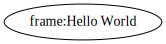

In [10]:
Frame('Hello World').plot()

### Operators

To manipulate frames in a pythonic way we need to define some used operators to do frame combinations:

In [11]:
class Frame(Frame):

    ## operators

    # automatic type cast
    def cast(self,that):
        if isinstance(that,Frame): return that
        return {
            str  : lambda x:Str(x),
            float: lambda x:Num(x),
            int  : lambda x:Int(x)
        }[that.__class__](that)

    # ` A[key] ` get frame by slot name (vocabulary lookup/fetch)
    def __getitem__(self,key):
        return self.slot[key]

    # ` A[key] = B ` set/create slot with name and frame (vocabulary write)
    def __setitem__(self,key,that):
        self.slot[key] = self.cast(that) ; return self

    # ` A << B ` set slot with operand type A[B.type] = B
    def __lshift__(self,that):
        that = self.cast(that) ; self[that.type] = that ; return self

    # ` A << B ` set slot with operand value A[B.val] = B
    def __rshift__(self,that):
        that = self.cast(that) ; self[that.val] = that ; return self

    # ` A // B ` push to nest[]ed
    def __floordiv__(self,that):
        self.nest.append(self.cast(that)) ; return self

## Primitives

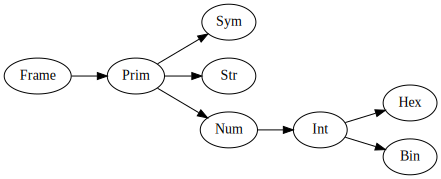

In [12]:
viz.edge('Frame','Prim')
viz.edge('Prim','Sym')
viz.edge('Prim','Str')
viz.edge('Prim','Num')
viz.edge('Num','Int')
viz.edge('Int','Hex')
viz.edge('Int','Bin')
viz

In [13]:
class Prim(Frame): pass
class Sym(Prim): pass
class Str(Prim): pass
class Num(Prim): pass
class Int(Num): pass
class Hex(Int): pass
class Bin(Int): pass


<frame:Hello> id:7f3c045ce0b8
	self = <frame:Hello> id:7f3c045ce0b8 _/
	some = <frame:attribute> id:7f3c045ceeb8
		frame = <frame:slot> id:7f3c045e0048
	string = <str:typecasted> id:7f3c045e00b8
	0: <frame:World> id:7f3c045cef28
	1: <frame:Hello> id:7f3c045ce0b8 _/
	2: <str:string> id:7f3c045cef98


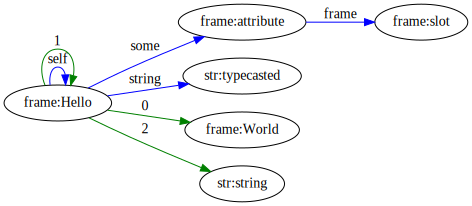

In [14]:
hello = Frame('Hello') // Frame('World')
hello['some'] = Frame('attribute') << Frame('slot')
hello['self'] = hello // hello # self ring
hello['string'] = 'typecasted' ; hello // 'string'
print(hello)
hello.plot()

# Picat object classes

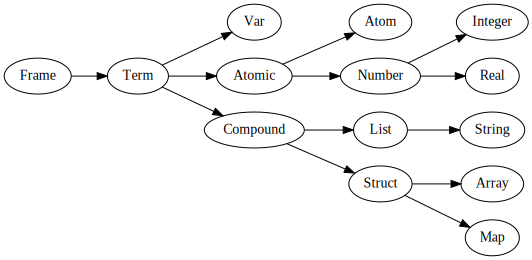

In [15]:
picat = graphviz.Digraph(graph_attr={'rankdir':'LR'})
picat.edge('Frame','Term')
picat.edge('Term','Var') ; picat.edge('Term','Atomic') ; picat.edge('Atomic','Atom')
picat.edge('Atomic','Number') ; picat.edge('Number','Integer') ; picat.edge('Number','Real')
picat.edge('Term','Compound') ; picat.edge('Compound','List') ; picat.edge('List','String')
picat.edge('Compound','Struct') ; picat.edge('Struct','Array') ; picat.edge('Struct','Map')
picat

Picat class tree is isolated from `metaL` class tree and have some aliases in atoms. It is done to follow Pical model as close as possible, and then map resulting structures to `metaL` classes the way like cross-model translation.

In [16]:
class Term(Frame): pass
class Var(Term): pass

In [17]:
class Atomic(Term): pass
class Atom(Atomic): pass
class Number(Atomic): pass
class Integer(Number): pass
class Real(Number): pass

In [18]:
class Compound(Term): pass
class List(Compound): pass
class String(List): pass
class Struct(Compound): pass
class Array(Struct): pass
class Map(Struct): pass